# I Solving the Sum of Two Digits Programming Challenge

## C++

In [3]:
%%writefile sum.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Overwriting sum.cpp


In [4]:
!g++ sum.cpp -o sum
!./sum

5
4
9

### Test input output files

In [5]:
%%writefile input1.txt
4 8

Writing input1.txt


In [6]:
%%writefile output1.txt
12

Writing output1.txt


In [7]:
%%writefile input2.txt
-5 9

Writing input2.txt


In [8]:
%%writefile output2.txt
4

Writing output2.txt


In [9]:
!./sum < input1.txt

12

In [10]:
!./sum < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [11]:
!grep -xvFf output1.txt output1.txt 

In [12]:
!grep -xvFf output1.txt output2.txt 

4


In [13]:
!grep -xvFf output2.txt output1.txt 

12


In [14]:
!./sum < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [15]:
!./sum < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [18]:
%%writefile sum.py
# python3


def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Overwriting sum.py


In [20]:
!python sum.py

2 16
18


In [21]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [22]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [23]:
%%writefile max_pairwise_product1.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product1.cpp


In [ ]:
!g++ max_pairwise_product1.cpp -o max_pairwise_product1
!./max_pairwise_product1

3
1 3 4
12


### Test 1: lagest input numbers 200000 200000 in the input

In [24]:
%%writefile input1.txt
5
1 3 200000 9 200000 23

Overwriting input1.txt


In [ ]:
!./max_pairwise_product1 < input1.txt

1345294336


In [25]:
%%writefile max_pairwise_product2.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product2.cpp


In [ ]:
!g++ max_pairwise_product2.cpp -o max_pairwise_product2
!./max_pairwise_product2 < input1.txt

40000000000


### Test 2  generate a tests file with the maximun n 200000 numbres and measure time

#c++

In [26]:
%%writefile generador.cpp
#include <iostream>
#include <stdlib.h>
#include <vector>
using namespace std;
int main(){
  int k = 0;
  while(k <= 200000){
  int tam = rand() % 1000;
  k++;
  cout << tam<<"\n";
  vector<int> arr;
  for(int i = 0; i < tam; i++){
      arr.push_back(rand()%10000);
      k++;
  }
  for(int i = 0; i < tam;i++ ){
      cout << arr[i]<<" ";
  }
  cout << "\n";
  }
  return 0;
}

Writing generador.cpp


In [30]:
!g++ generador.cpp -o generador
!./generador > salidagenerador.txt

### Efficient solution 

In [32]:
%%writefile efficient_maxpairwise.cpp
#include <iostream>
#include <vector>
using namespace std;
long long MaxPairwiseProductFast(const vector<int>& numbers){
    int n = numbers.size();

    int max_index1 = -1;
    for(int i = 0; i<n ; i++){
        if((max_index1 == -1 )|| (numbers[i]> numbers[max_index1])){
            max_index1 = i;
        }
    }
    int max_index2 = -1;
    for(int j = 0; j<n ; j++){
        if((j != max_index1) && ((max_index2 == -1) || (numbers[j] > numbers[max_index2]))){
            max_index2 = j;
        }
    }
    return ((long long)(numbers[max_index1])) * numbers[max_index2];
}
int main(){ 
    int n; 
    cin >> n;
    vector<int> arr(n);
    for(int i = 0; i < n; i++ ){
        cin >> arr[i];
    }
    cout << MaxPairwiseProductFast(arr)<<"\n";
    
    return 0;
}

Writing efficient_maxpairwise.cpp


In [35]:
!g++ efficient_maxpairwise.cpp -o efficient_maxpairwise
%time
!./efficient_maxpairwise

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.54 µs
3
1 3
3
9


Stress tests 

Measure with test file of the maximun n 200000 numbres 

In [36]:
%%writefile stresstests.cpp
#include <iostream>
#include <vector>
using namespace std;
long long MaxPairwiseProductFast(const vector<int>& numbers){
    int n = numbers.size();

    int max_index1 = -1;
    for(int i = 0; i<n ; i++){
        if((max_index1 == -1 )|| (numbers[i]> numbers[max_index1])){
            max_index1 = i;
        }
    }
    int max_index2 = -1;
    for(int j = 0; j<n ; j++){
        if((j != max_index1) && ((max_index2 == -1) || (numbers[j] > numbers[max_index2]))){
            max_index2 = j;
        }
    }
    return ((long long)(numbers[max_index1])) * numbers[max_index2];
}
long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}
int main(){ 
    while(true){
    int n; 
    cin >> n;
    vector<int> arr(n);
    for(int i = 0; i < n; i++ ){
        cin >> arr[i];
    }
    long long rapida = MaxPairwiseProductFast(arr);
    long long lenta = MaxPairwiseProduct(arr);
    if(rapida != lenta){
    cout << "Wrong answer"<<"\n";
    break;
    }else{
        cout << "OK"<<"\n";
    }
    }
    return 0;
}

Writing stresstests.cpp


In [37]:
!g++ stresstests.cpp -o stress
%time
!./stress < salidagenerador.txt

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 9.06 µs
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
/bin/bash: line 1:   898 Segmentation fault      (core dumped) ./stress < salidagenerador.txt


## Python

In [40]:
def max_pairwise_product_fast(numbers):
    n = len(numbers)
    max_index1 = -1
    for i in range(n):
        if max_index1 == -1 or numbers[i] > numbers[max_index1]:
            max_index1 = i

    max_index2 = -1
    for i in range(n):
        if i != max_index1 and (max_index2 == -1 or numbers[i] > numbers[max_index2]):
            max_index2 = i

    return numbers[max_index1] * numbers[max_index2]   

if __name__ == '__main__':
    input_n = int(input())
    input_numbers = [int(x) for x in input().split()]
    print(max_pairwise_product_fast(input_numbers))

2
2 4
8


In [41]:
%time
max_pairwise_product_fast([2,4])

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


8

In [45]:
%%writefile stress_python.py
#python 3

def max_pairwise_product(numbers):
    n = len(numbers)
    max_product = 0
    for first in range(n):
        for second in range(first + 1, n):
            max_product = max(max_product,
                numbers[first] * numbers[second])

    return max_product

def max_pairwise_product_fast(numbers):
    n = len(numbers)
    max_index1 = -1
    for i in range(n):
        if max_index1 == -1 or numbers[i] > numbers[max_index1]:
            max_index1 = i

    max_index2 = -1
    for i in range(n):
        if i != max_index1 and (max_index2 == -1 or numbers[i] > numbers[max_index2]):
            max_index2 = i

    return numbers[max_index1] * numbers[max_index2]   
def estresar():
    contador = 0;
    limite = len(open("/content/salidagenerador.txt").readlines(  ))
    while True:
      input_n = int(input())
      input_numbers = [int(x) for x in input().split()]
      rapida = max_pairwise_product(input_numbers)
      lenta = max_pairwise_product_fast(input_numbers)
      contador = contador + 1
      if(contador <= limite and rapida == lenta):
        print("OK")
      else: 
        print("Wrong answer")
        return 
estresar()

Overwriting stress_python.py


In [46]:
%time
!python stress_python.py < salidagenerador.txt

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
Traceback (most recent call last):
  File "stress_python.py", line 40, in <module>
    estresar()
  File "stress_pyth

## Coursera Submissions Screenshots

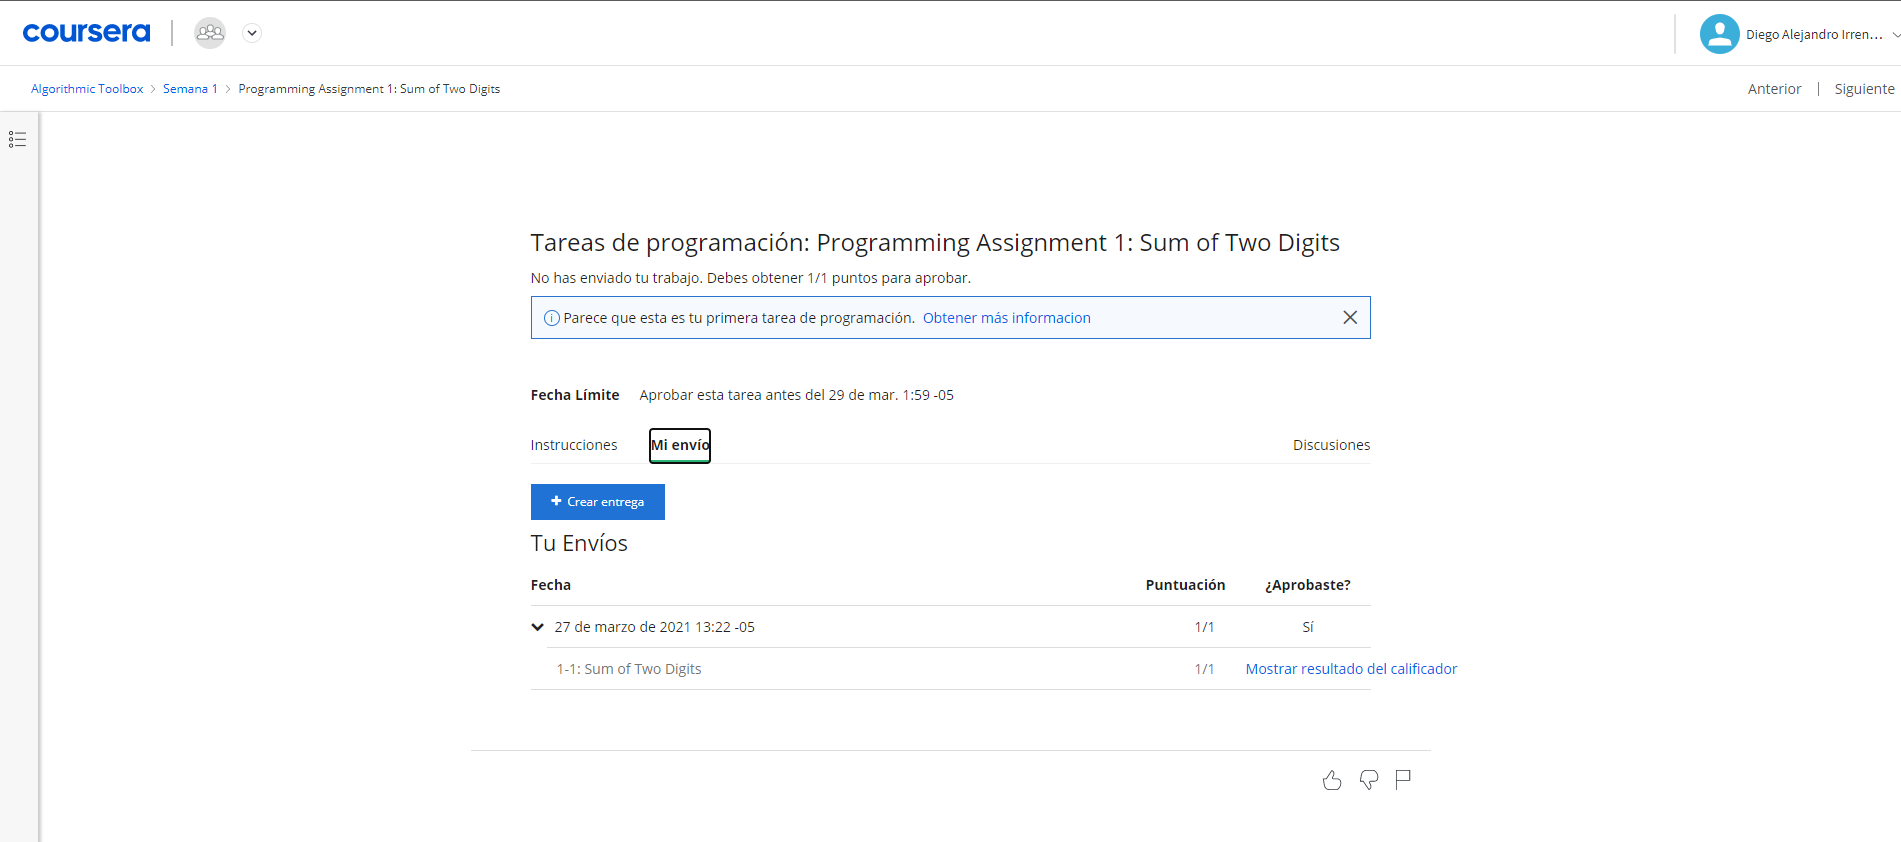

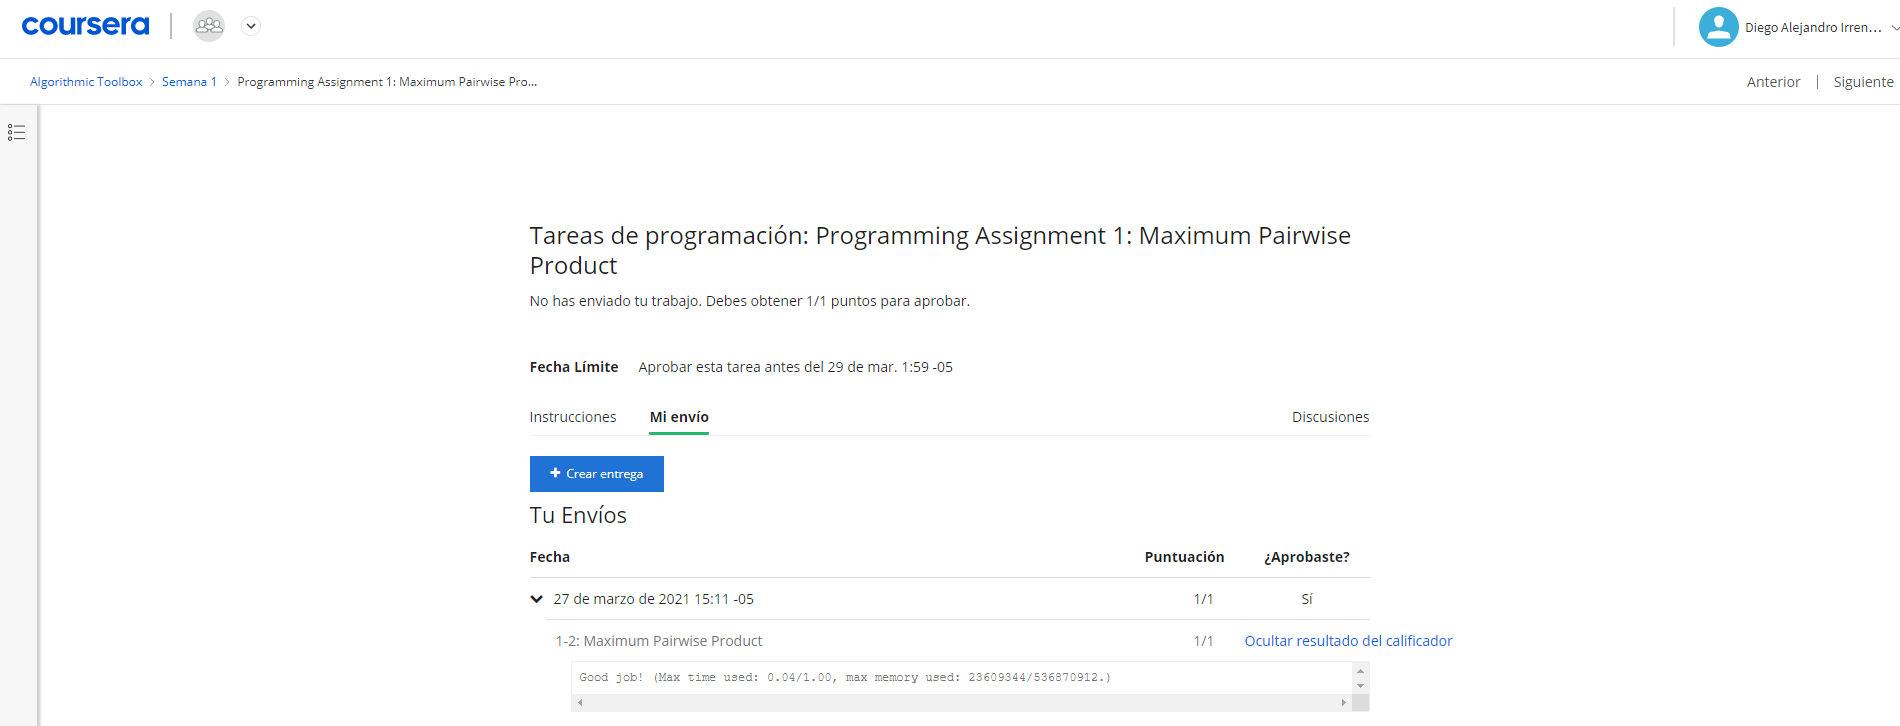

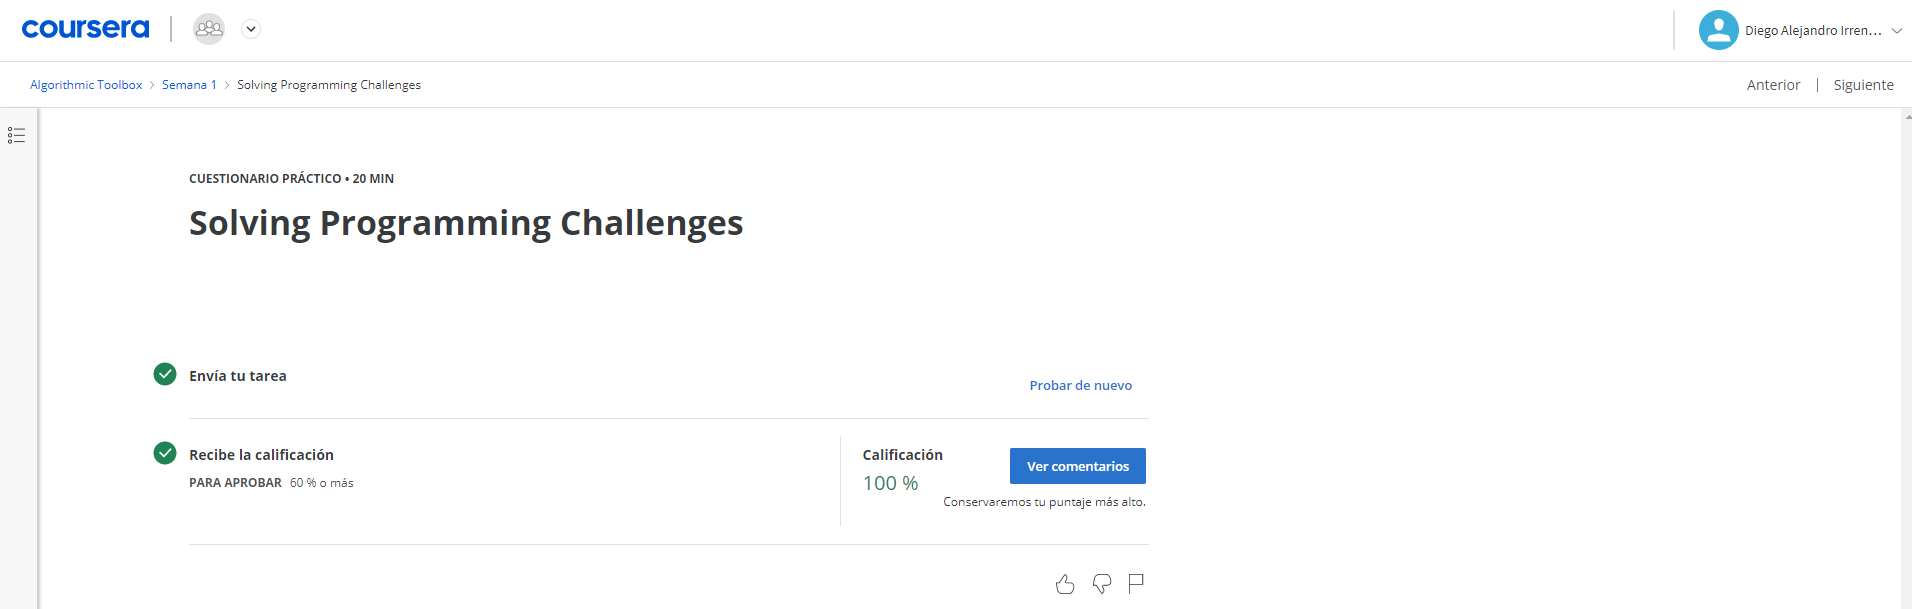